In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd
from scipy import signal
import pywt

import daslib

In [24]:

def wavelet_threshold_denoising(signal, wavelet='db1', mode='soft', threshold_type='sqtwolog', level=None):
    # Aplicar transformada de wavelet discreta (DWT)
    coeffs = pywt.wavedec(signal, wavelet, mode='periodization', level=level)

    # Calcular el umbral basado en el tipo especificado
    if threshold_type == 'sqtwolog':
        # Umbral de Stein para la desviación estándar del ruido
        threshold = np.sqrt(2 * np.log(len(signal))) * (np.median(np.abs(coeffs[-1])) / 0.6745)
    else:
        raise ValueError(f"Threshold type '{threshold_type}' not supported.")

    # Aplicar umbral a los coeficientes de detalle
    coeffs_thresholded = []
    for i, coeff in enumerate(coeffs):
        if i == 0:
            # No aplicar umbral al coeficiente de aproximación
            coeffs_thresholded.append(coeff)
        else:
            if mode == 'soft':
                coeffs_thresholded.append(pywt.threshold(coeff, threshold, mode='soft'))
            elif mode == 'hard':
                coeffs_thresholded.append(pywt.threshold(coeff, threshold, mode='hard'))
            else:
                raise ValueError(f"Mode '{mode}' not supported.")

    # Aplicar transformada de wavelet discreta inversa (IDWT)
    denoised_signal = pywt.waverec(coeffs_thresholded, wavelet, mode='periodization')

    return denoised_signal

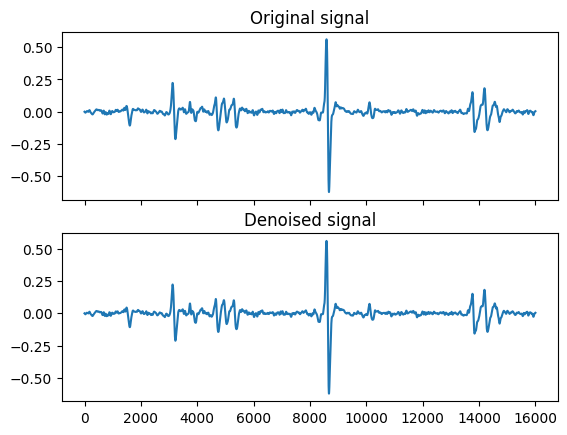

In [26]:
s = daslib.DasSignal.load_from_file("Z:/DAS/2021-11-30_Medidas/medida_211130_11_55_19.mat")
data = s.get_signal()
#select one distance 
signal = data.T[800]
#pass band filter from 0.2 to 2hz
signal = daslib.bandpass_filter(signal, 0.1, 2, 200,2)

#denoise signal
denoised_signal = wavelet_threshold_denoising(signal, wavelet='sym2', mode='soft', threshold_type='sqtwolog', level=None)
#plot signal and denoised signal in two charts
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(signal)
ax1.set_title('Original signal')
ax2.plot(denoised_signal)
ax2.set_title('Denoised signal')
plt.show()



